# Taller Evaluado Nº 0: Proceso ETL y Exploración Simple
## TEL-354: Minería de Datos 2020-1 (20200420)
### Prof. Mauricio Araya

### 1.- Extract, Transfer and Load

**1.1**- Busque el ``Toy Dataset`` por Carlo Lepelaars del sitio web **Kaggle**. Kaggle es un portal donde uno puede bajar datasets asdociados a un desafío. Este desafío puede traducirse en premios en dinero, prestigio, regalos o (como ahora en la contingencia COVID-19) el premio puede ser solo aportar para solucionar un problema. 

En la celda siguiente, escriba en Markdown la información de **contexto** del dataset y el link a donde lo encontró. Agregue además una tabla con la descripción de cada columna.

### 1.1 CONTEXTO DEL DATASET

* Dataset Ficticio para el análisis exploratorio de datos y para probar modelos simples de predicción.
* El Dataset se constituye de 150000 filas y 6 columnas.

Las columnas del dataset se constituyen de:
<b> |  Número : Entero | Ciudad : String  | Género : Booleano | Edad : Entero | Ingreso Monetario : Flotante | Enfermo : Booleano |</b>

**PREGUNTA**: ¿A qué tipo de datos corresponde cada columna? (texto, categórico, natural, real, etc.). Agregué esta información a su tabla de deescripción

**1.2**- Descargue el dataset y guardelo en el mismo directorio de trabajo en el que está este notebook. 

**PREGUNTA**: En la siguiente celda (en Markdown), explique cuál es el tipo de archivo del dataset copiando alguna breve explicación que encuentre en google, y referenciando la fuente con un link clickeable. Responda además, ¿Qué otros formatos de archivos podrían contener la misma información para este ``Toy Dataset``? Agregue un link además con una explicación de como convertir el ``.csv`` a otro formato.

### 1.2 Respuesta

* Se define ".csv" al tipo de documento en formato abierto sencillo para representar datos en forma de tabla, en las que las columnas se separan por comas y las filas por saltos de línea.
<https://es.wikipedia.org/wiki/Valores_separados_por_comas> 

**1.3**- Revise los notebooks en el aula para poder cargar el dataset en memoria. Para esto ocupe la biblioteca ``pandas``, que es un gestor de tablas con compatibilidad en iPython notebooks. Verifique que el objeto DataFrame generado "sabe" como desplegarse en un notebook. Busque además en la documentación de ``pandas`` como conocer el tipo de datos de cada columna e imprima esto en una nueva celda.

In [8]:
import pandas as pd 
df = pd.read_csv("toy_dataset.csv")

df.dtypes


Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

**PREGUNTA**: ¿La información de tipos que usted escribió en el punto 1.1 está completamente contenida en lo que ``pandas`` reporta? Explique en no más de 3 frases.

### Respuesta
 Pandas reporta Ciudad, Género, Enfermedad  como objeto sin embargo las otras coinciden según se planteo más arriba.

### 2- Exploración Simple de Datos

**2.1**- El objeto básico de ``pandas`` se llama ``DataFrame``. Busque como imprimir una *estadística descriptiva* de los datos (media, desviación estándar, percentiles, etc.).

In [9]:
df.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


**PREGUNTA**: Solo para algunas columnas hace sentido hacer una descripción estadística. ¿Cuáles son y por qué? 

### Respuesta 

Claramente hace sentido trabajar estadísticamente con los datos numéricos del dataset, por lo cual al usar el método describe, trabaja con los datos que pandas señala como númericos. {Número, Edad, Ingreso}

**2.2**- Utilice la biblioteca de visualización llamada ``matplotlib`` para hacer un gráfico de dispersión de la edad y el ingreso (no tenga miedo a hacer copy/paste). Modifique su gráfico para imprimir de distinto color los individuos enfermos. Puede modificar con el parámetro alpha para obtener una mejor visualización.

Text(0.5, 1.0, 'Edad v/s Ingresos')

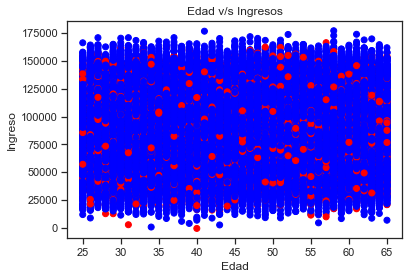

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = {'Yes':'red', 'No':'blue'}

plt.scatter(df['Age'], df['Income'], c=df['Illness'].apply(lambda x: colors[x]))
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.title('Edad v/s Ingresos')

**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados? (máximo 3)

**2.3**- Utilice ahora la biblioteca ``seaborn`` y su función ``pairplot`` sobre el DataFrame para hacer visualizaciones avanzadas de forma automática. Puede por ejemplo establecer el color de distintas variables categóricas utilizando ``hue``. 

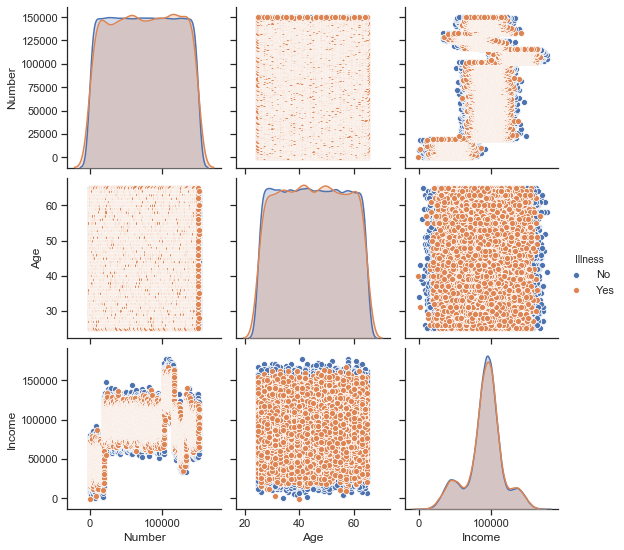

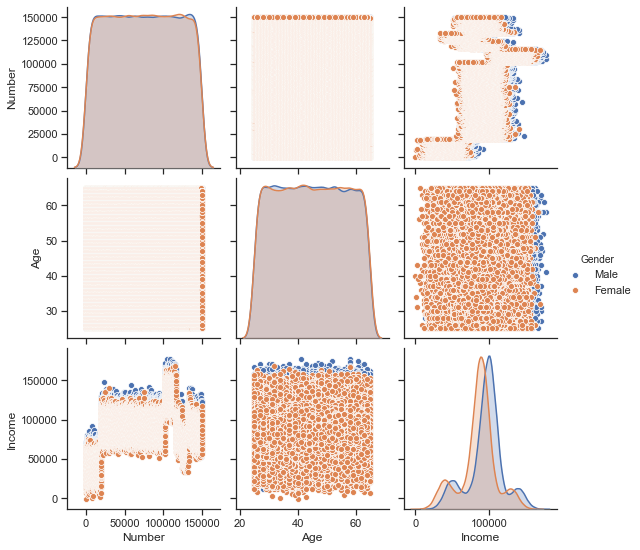

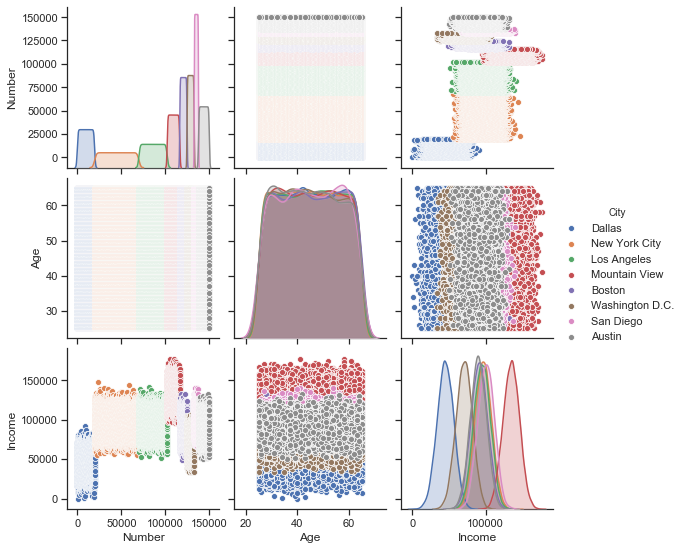

In [22]:
import seaborn as sns

sns.set(style="ticks",color_codes = True)

sns.pairplot(df, hue="Illness")
sns.pairplot(df, hue="Gender")
sns.pairplot(df, hue="City")

**PREGUNTA**: ¿Qué conclusiones puede usted sacar sobre la distribución de la enfermedad, el género y la ciudad?

### Respuesta

1. Al Graficar la información según la categoría de enfermos resultan 3 graficos de interés.
    * Número v/s Edad.      Muestra que existen casos confirmados en todas las edades.
    * Número v/s Ingreso.   Se puede notar 2 grupos de enfermos, los que tienen una renta de 50.000, y el segundo que registra una renta superior a los 100.000.
    * Ingreso v/s Edad.     Se recalca nuevamente que existen dos grupos de todas las edades que se mantienen sanos, los cuales se situan en este gráfico, unos bajo los 50.000 y el otro sobre los 160.000
    
2. Al agruparlos por género, nuevamente existen los tres gráficos ya mencionados.
    * Número v/s Edad.      La muestra presenta variedad de género y edades.
    * Número v/s Ingreso.   Se puede ver una tendencia clara a mayores ingresos por parte de los hombres.
    * Ingreso v/s Edad.     Se puede apreciar que existe un grupo de hombres de avanzada edad que registran las mayores rentas.

3. Al agruparlos por ciudad, los tres gráficos presentan.
    * Número v/s Edad.      Existen datos de personas de todas las edades de cada ciudad.
    * Número v/s Ingreso.   Las personas de Mountain View registran los mayores salarios.
    * Ingreso v/s Edad.     Las peores rentas se registran en Dallas y Washington

### 3- Subgrupos
**3.1** Una herramienta importante en el análisis de variables categóricas es el agrupar por sus valores. La función ``groupby`` de ``pandas`` permite realizar una vista de esta forma. Agrupe los datos por ciudad e imprima la cantidad de individuos que hay en cada ciudad. Además describa las variables agrupadas de enfermedad e ingreso. 

In [45]:
group = df.groupby('City')
group.size().sort_values()


City
San Diego           4881
Washington D.C.     8120
Boston              8301
Austin             12292
Mountain View      14219
Dallas             19707
Los Angeles        32173
New York City      50307
dtype: int64

**PREGUNTA**: ¿Qué conclusiones simples puede usted sacar de estas descripciones? (solo 2)

**3.2** Calcule el ratio de personas enfermas por ciudad y comparela con el ingreso medio en cada ciudad.

In [52]:
df_city = df.groupby(['City']).mean()

,Number,Age,Income
City,,,
Austin,143854.5,44.651237,90277.513423
Boston,120557.0,45.197807,91554.571497
Dallas,9854.0,45.058761,45252.231187
Los Angeles,86101.0,44.994094,95264.155410
Mountain View,109297.0,44.992756,135078.415782
New York City,44861.0,44.922118,96857.131393
San Diego,135268.0,44.965171,100756.209178
Washington D.C.,128767.5,44.802709,70991.612808


In [58]:
df.groupby(['Illness','City']).count().drop(['Gender','Age','Income'], axis=1)

Number
Illness City                   
No      Austin            11281
        Boston             7615
        Dallas            18094
        Los Angeles       29605
        Mountain View     13041
        New York City     46286
        San Diego          4487
        Washington D.C.    7452
Yes     Austin             1011
        Boston              686
        Dallas             1613
        Los Angeles        2568
        Mountain View      1178
        New York City      4021
        San Diego           394
        Washington D.C.     668

In [70]:
df_ill = df[df['Illness']== 'Yes'].groupby('City').count().drop(['Number','Age','Gender','Income'],axis = 1)
df_ill['Mean income'] = df.groupby('City').mean().drop(['Number','Age'], axis = 1)
df_ill['Habitants'] = df.groupby('City').size()
df_ill['Ill_percent'] = (df_ill['Illness'] * 100)/ df_ill['Habitants']
df_ill

,Illness,Mean income,Habitants,Ill_percent
City,,,,
Austin,1011,90277.513423,12292,8.224862
Boston,686,91554.571497,8301,8.264065
Dallas,1613,45252.231187,19707,8.184909
Los Angeles,2568,95264.155410,32173,7.981848
Mountain View,1178,135078.415782,14219,8.284689
New York City,4021,96857.131393,50307,7.992923
San Diego,394,100756.209178,4881,8.072116
Washington D.C.,668,70991.612808,8120,8.226601


Text(0.5, 1.0, 'Ill Percent v/s Mean Income')

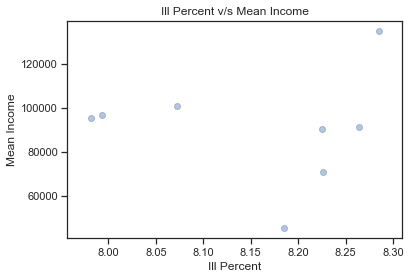

In [73]:
x = df_ill['Ill_percent']
y = df_ill['Mean income']
plt.scatter(x,y, alpha = 0.4)
plt.xlabel('Ill Percent')
plt.ylabel('Mean Income')
plt.title('Ill Percent v/s Mean Income')


### Tabla de ingreso medio, total por ciudad y porcentajes de enfermos.

| Nombre          | Cantidad | Enfermos | Ingreso medio  | Porcentaje de enfermos |
|---------------- |:--------:|:--------:|:--------------:|:----------------------:|
|     Austin      |   12292  |   1011   |90277.5         | 8.2|
|     Boston      |   8301   |   686    |91554.6         | 9.01|
|     Dallas      |   19707  |   2568   |45252.2         | 8.18|
|   LosAngeles    |   32173  |   2568   |  95264.2       | 7.98|
|  Mountain View  |   14219  |   1178   |    135078.4    | 8.28|
|  New York City  |   50307  |   4021   |    96857.1     | 7.99|
|    San Diego 	  |   4881   |    394   |  100756.2      | 8.07|
| Washington D.C. |   8120   |    668   |    70991.6     | 8.23 |


#### Esta tabla contiene información recolectada de las anteriores consultas, con esta información se responde la siguiente pregunta.

**PREGUNTA FINAL**: ¿Existe una relación entre el ratio de personas enfermas y el ingreso medio? Soporte su respuesta en los gráficos y/o tablas generadas hasta este punto. 

Luego de analizar la tabla anterior, podemos notar que no existe ninguna relación entre el ingreso medio y el número de enfermos, basta con observar la ciudad de Dallas que tiene el menor ingreso medio registrado y aún así su porcentaje de enfermos se mantiene cercano a la tendencia de un 8%.

Además, se comparó el ingreso medio y el total de personas en el gráfico sin encontrar informacion concluyente.
